In [48]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [60]:
df_lung_gene = pd.read_csv("LUNG_Gene_Expression.txt",delimiter="\t")
column_names = df_lung_gene.columns.values.tolist()
column_names.append("")
df_lung_gene.columns=column_names[1:]
df_lung_gene = df_lung_gene.iloc[: , :-1]

df_methy_exp = pd.read_csv("LUNG_Methy_Expression.txt",delimiter="\t")
column_names = df_methy_exp.columns.values.tolist()
column_names.append("")
df_methy_exp.columns=column_names[1:]
df_methy_exp = df_methy_exp.iloc[: , :-1]

df_lung_mirna = pd.read_csv("LUNG_Mirna_Expression.txt",delimiter="\t")
column_names = df_lung_mirna.columns.values.tolist()
column_names.append("")
df_lung_mirna.columns=column_names[1:]
df_lung_mirna = df_lung_mirna.iloc[: , :-1]


In [61]:
matrix_lung_gene=df_lung_gene.corr(method='spearman')
matrix_lung_methy=df_methy_exp.corr(method='spearman')
matrix_lung_mirna=df_lung_mirna.corr(method='spearman')

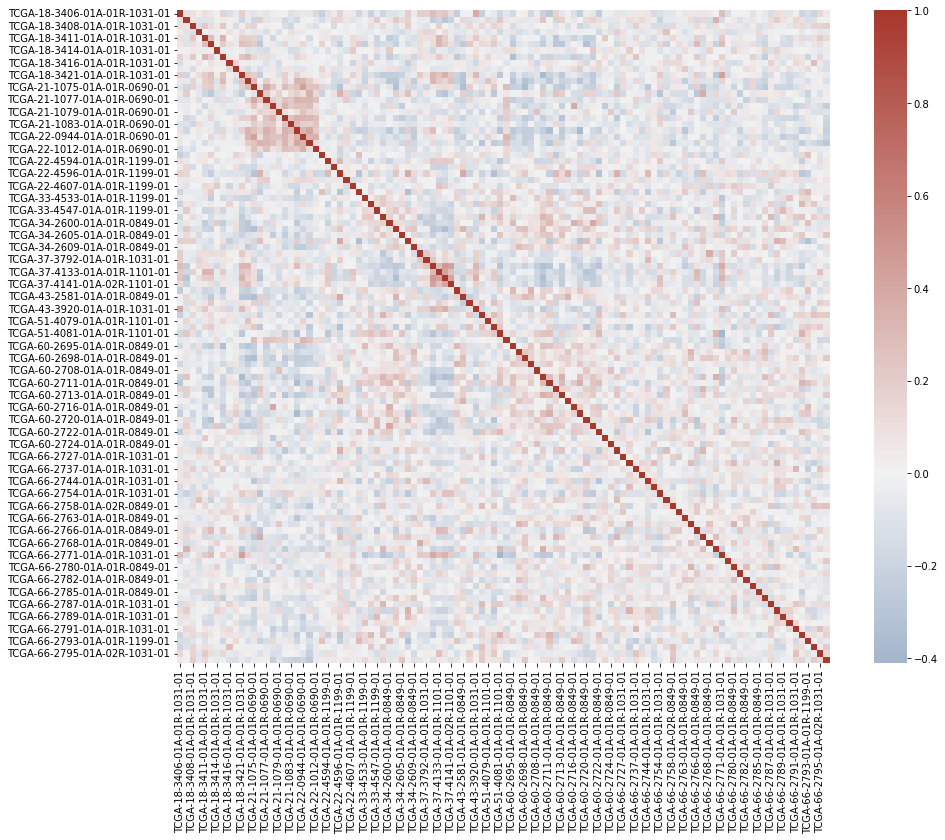

In [62]:
#LUNG_GENE
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_gene, center=0,
                fmt='.2f', square=True, cmap=cmap)

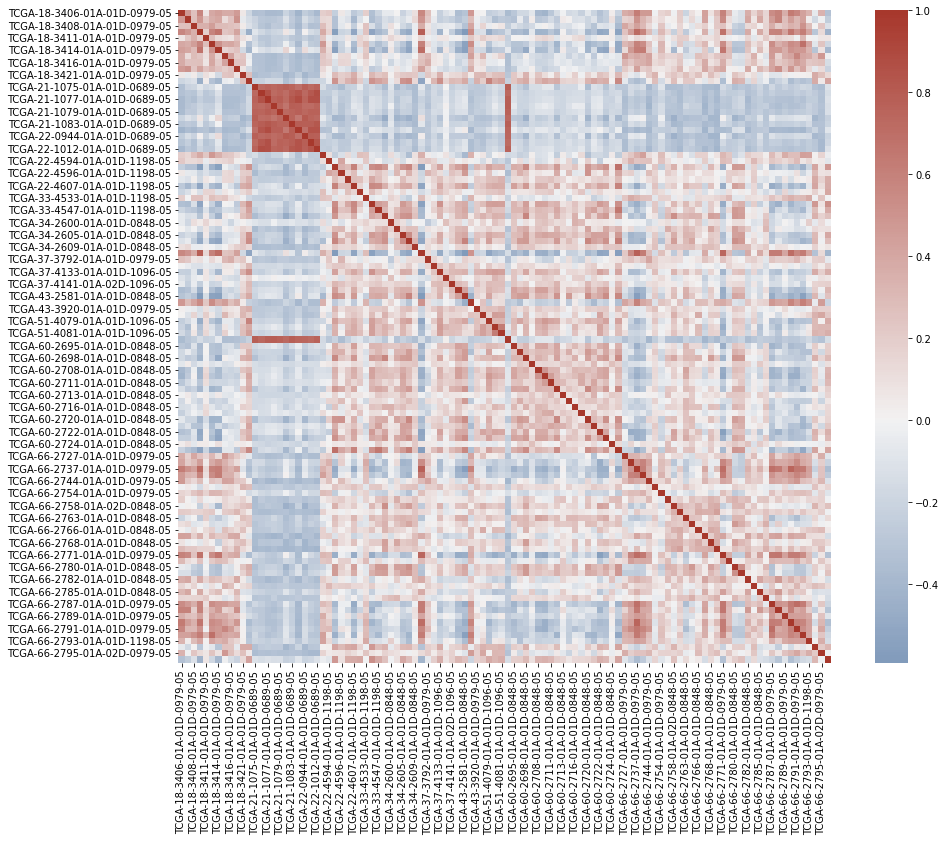

In [63]:
#LUNG_METHY
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_methy, center=0,
                fmt='.2f', square=True, cmap=cmap)

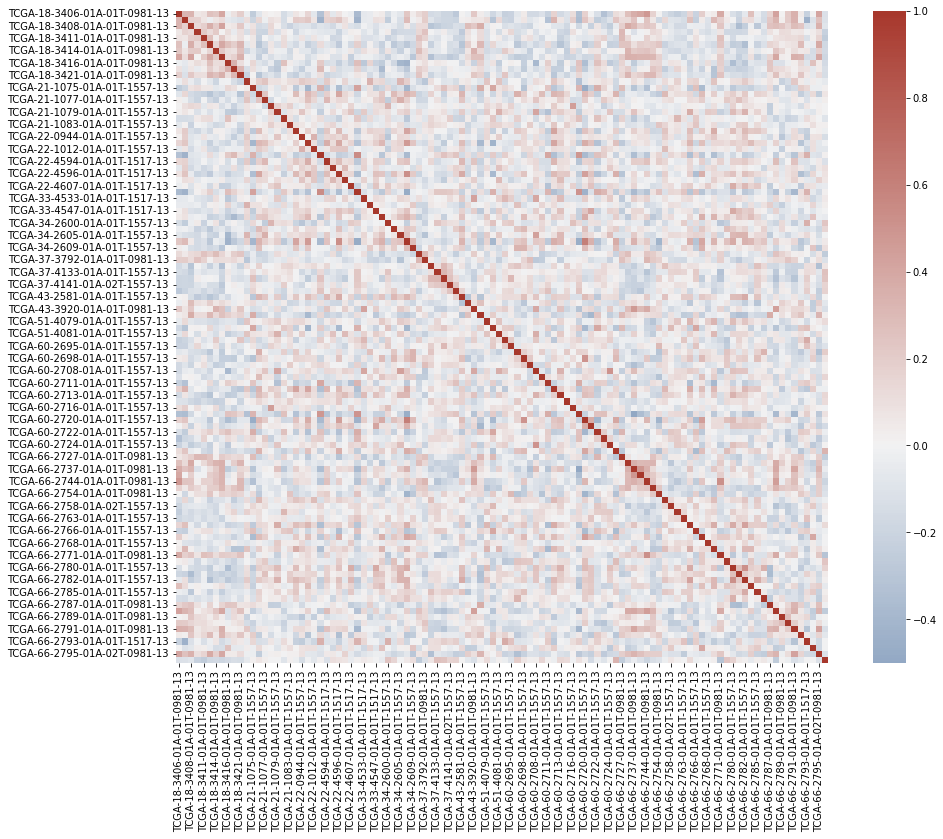

In [64]:
#LUNG_MIRNA
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix_lung_mirna, center=0,
                fmt='.2f', square=True, cmap=cmap)

###Build the Patient similarity networks for each datatype. Use a weighted network where each edge is weighted by the correlation between its two nodes. In the correlation matrix, we compute all pairs of patients. We can define a threshold for which a connection can be considered. Two patients (i,j) are connected in the graph: if |corr(i,j)| >= X. Thus, in the graph only edges corresponding to a correlation greater than X are considered.

Hint: use the NetworkX package.



In [69]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.from_pandas_adjacency(matrix_lung_gene)
print(df_lung_gene.values)

[[-0.806226 -0.382872  0.401741 ...  0.112034  1.17652   0.344574]
 [ 1.479097  1.444322 -0.860771 ... -1.044408  0.583019 -0.377197]
 [ 0.126642  1.202567  0.165575 ...  0.651901 -0.190551  0.994301]
 ...
 [ 0.973651  1.059816 -0.587189 ...  1.638837  0.459291 -0.98515 ]
 [ 2.24132   1.225202  0.165238 ... -3.256052  0.045632 -0.196674]
 [ 0.334596  0.640825  0.059908 ... -1.292222 -0.528515 -1.036957]]


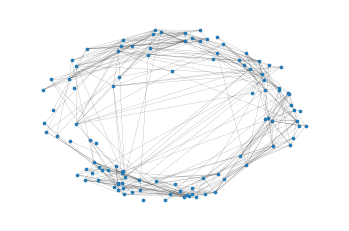

In [74]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.2 and u != v]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if u != v]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=7)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=0.1)
#nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.1)


# node labels

# edge weight labels
nx.write_gexf(G,"./lung_gene.gexf")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.show()

In [76]:
threshold = 0.2

# filter out all edges above threshold and grab id's
long_edges = list(filter(lambda e: e[2] > threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)

In [77]:
print(nx.info(G))

Graph with 106 nodes and 5225 edges


C:\Users\lmtrinta\AppData\Local\Temp\ipykernel_7372\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
